In [59]:
from glob import glob
import os
import subprocess
from PIL import Image
import sys
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2

In [16]:
image_remove_list=glob('../../data/IGNITE/images/he/*_with_context.png')

mask_remove_list=[i.replace('images/','annotations/') for i in image_remove_list]
for i in tqdm(range(len(mask_remove_list))):
    if not os.path.exists(mask_remove_list[i]):
        continue
    os.remove(mask_remove_list[i])
    
for i in tqdm(range(len(image_remove_list))):
    if not os.path.exists(image_remove_list[i]):
        continue
    os.remove(image_remove_list[i])


0it [00:00, ?it/s]
0it [00:00, ?it/s]


In [60]:
image_list=glob('../../data/IGNITE/images/he/*.png')
mask_list=[i.replace('images/','annotations/') for i in image_list]
label_list=[]
for i in tqdm(range(len(mask_list))):
    mask=255-np.array(Image.open(mask_list[i]))
    label_temp=np.unique(mask)
    label_list.append(label_temp)

100%|██████████| 408/408 [00:08<00:00, 46.11it/s]


In [41]:
label_list
    


[array([1, 3, 4, 8], dtype=uint8),
 array([ 0,  3,  8,  9, 10, 12], dtype=uint8),
 array([  0,   1,   2,   3,   4,   8,  12, 255], dtype=uint8),
 array([0, 1, 3, 8], dtype=uint8),
 array([  1,   3,   4,  12, 255], dtype=uint8),
 array([  1,   3,   7,   8,  12, 255], dtype=uint8),
 array([1, 3, 7], dtype=uint8),
 array([ 0,  3,  8,  9, 11], dtype=uint8),
 array([  1,   3,   4,   7,   8,  12, 255], dtype=uint8),
 array([  0,   1,   3,   9, 255], dtype=uint8),
 array([ 0,  1,  3,  4,  7,  8, 12], dtype=uint8),
 array([  0,   8, 255], dtype=uint8),
 array([  0,   1,   3,   6,   7,   8,   9,  11, 255], dtype=uint8),
 array([  0,   1,   3,   5,   7,   8,  12, 255], dtype=uint8),
 array([0, 3], dtype=uint8),
 array([  0,   1,   2,   3,   4,   5,   7,   8,  12, 255], dtype=uint8),
 array([1, 3], dtype=uint8),
 array([  1,   3,   4,  12, 255], dtype=uint8),
 array([ 0,  3,  4,  6,  8, 12], dtype=uint8),
 array([  0,   3,   5,  10,  12, 255], dtype=uint8),
 array([ 0,  3,  5,  7,  8,  9, 10], dt

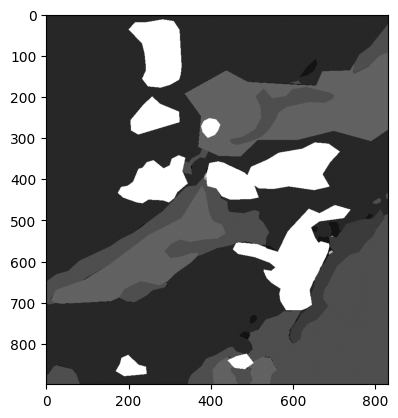

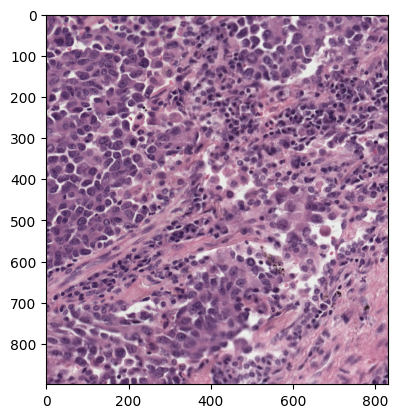

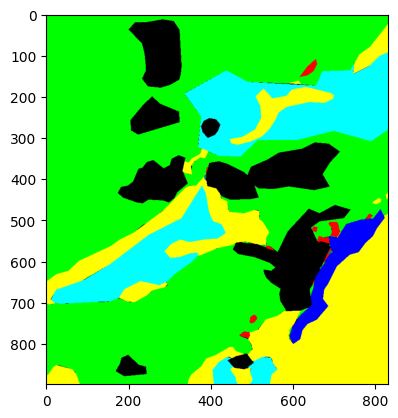

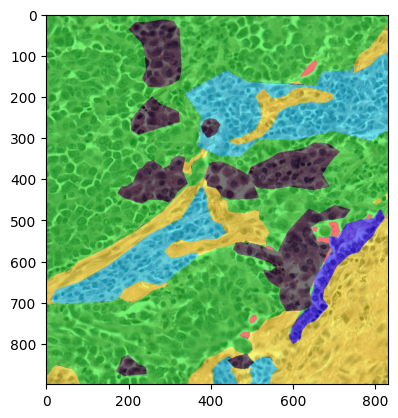

In [109]:
mask=255-np.array(Image.open(mask_list[2]))+1
mask[np.where(mask==256)]=0
plt.imshow(mask,cmap='gray')
plt.show()
img=Image.open(image_list[2])
plt.imshow(img)
plt.show()
overlap=np.zeros((mask.shape[0],mask.shape[1],3))
overlap[np.where(mask==1)]=[255,0,0]
overlap[np.where(mask==2)]=[0,255,0]
overlap[np.where(mask==3)]=[0,0,255]
overlap[np.where(mask==4)]=[255,255,0]
overlap[np.where(mask==5)]=[0,255,255]
overlap[np.where(mask==6)]=[255,0,255]
overlap[np.where(mask==7)]=[128,128,0]
overlap[np.where(mask==8)]=[128,0,128]
overlap[np.where(mask==9)]=[0,128,128]
overlap[np.where(mask==10)]=[128,128,128]
overlap_img=Image.fromarray(overlap.astype(np.uint8))
plt.imshow(overlap_img)
plt.show()
blended = Image.blend(img, overlap_img, alpha=0.5)
plt.imshow(blended)
plt.show()

In [88]:
mask=np.array(Image.open('patient1_he_roi1_with_context.png'))
mask1=np.array(Image.open('../../data/IGNITE/annotations/he/patient1_he_roi1.png'))
print(np.unique(mask))
print(np.unique(mask1))

[ 0  1  2  3  4  8  9 13]
[243 247 248 252 253 254 255]


In [ ]:
np.unique(mask)
 0,   1,   2,   3,   4,   8,  12, 255

array([ 0,  1,  2,  3,  4,  5,  9, 13], dtype=uint8)